**Carotid segmentation in ultrasound images**
*italicised text*

from a dataset containing 1100 common carotid artery ultrasound images

dataset link:https://www.kaggle.com/datasets/orvile/carotid-ultrasound-images


In [1]:
import os
import numpy as np
import cv2
import glob
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Flatten

**Dataset download**
<span style="font-size:24px">Custom styled text</span>

In [2]:
import kagglehub

path = kagglehub.dataset_download("orvile/carotid-ultrasound-images")

print("Path to dataset files:", path)

100%|██████████| 284M/284M [00:01<00:00, 190MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/orvile/carotid-ultrasound-images/versions/2


**Data path**
<span style="font-size:24px">Custom styled text</span>


In [3]:
img_dir= '/root/.cache/kagglehub/datasets/orvile/carotid-ultrasound-images/versions/2/Common Carotid Artery Ultrasound Images/Common Carotid Artery Ultrasound Images/US images'
msk_dir= '/root/.cache/kagglehub/datasets/orvile/carotid-ultrasound-images/versions/2/Common Carotid Artery Ultrasound Images/Common Carotid Artery Ultrasound Images/Expert mask images'

images= sorted(glob.glob(os.path.join(img_dir, '*.png')))
masks= sorted(glob.glob(os.path.join(msk_dir, '*.png')))

print(len(images))
print(len(masks))

1100
1100


**Data splitting**
<span style="font-size:24px">Custom styled text</span>


In [4]:
import os
import random
import shutil

# Define paths
train_img_dir = "/kaggle/train/images"
train_mask_dir = "/kaggle/train/masks"
val_img_dir = "/kaggle/val/images"
val_mask_dir = "/kaggle/val/masks"
test_img_dir = "/kaggle/test/images"
test_mask_dir = "/kaggle/test/masks"

# Create directories if they don't exist
for dir_path in [train_img_dir, train_mask_dir, val_img_dir, val_mask_dir, test_img_dir, test_mask_dir]:
    os.makedirs(dir_path, exist_ok=True)

# Get all image names and filter only those that have corresponding masks
image_names = set(f for f in os.listdir(img_dir) if f.endswith((".png")))
mask_names = set(f for f in os.listdir(msk_dir) if f.endswith((".png")))

# Ensure only files that exist in both folders are used
valid_image_names = list(image_names.intersection(mask_names))
print(f'unique images and masks: {len(valid_image_names)}')

# Shuffle for randomness
random.seed(42)
random.shuffle(valid_image_names)

# Split the dataset
test_images = valid_image_names[:100]
train_images = valid_image_names[100:850]  # 750 images for training
val_images = valid_image_names[850:1100]   # 250 images for validation

# Function to move files
def move_files(image_list, src_img_dir, src_mask_dir, dest_img_dir, dest_mask_dir):
    for img in image_list:
        shutil.move(os.path.join(src_img_dir, img), os.path.join(dest_img_dir, img))
        shutil.move(os.path.join(src_mask_dir, img), os.path.join(dest_mask_dir, img))

# Move images and corresponding masks
move_files(test_images, img_dir, msk_dir, test_img_dir, test_mask_dir)
move_files(train_images, img_dir, msk_dir, train_img_dir, train_mask_dir)
move_files(val_images, img_dir, msk_dir, val_img_dir, val_mask_dir)

print("Dataset split completed successfully!")


unique images and masks: 1100
Dataset split completed successfully!


In [5]:
len(train_images)

750

**Showing some train images and their corresponding masks**
<span style="font-size:24px">Custom styled text</span>


Paths exist!
/kaggle/train/images/202201121847410041VAS_slice_2562.png 
 /kaggle/train/masks/202201121847410041VAS_slice_2562.png
Paths exist!
/kaggle/train/images/202201121808450029VAS_slice_5525.png 
 /kaggle/train/masks/202201121808450029VAS_slice_5525.png
Paths exist!
/kaggle/train/images/202201121854340043VAS_slice_2168.png 
 /kaggle/train/masks/202201121854340043VAS_slice_2168.png
Paths exist!
/kaggle/train/images/202202071355210050VAS_slice_58.png 
 /kaggle/train/masks/202202071355210050VAS_slice_58.png
Paths exist!
/kaggle/train/images/202201121858500045VAS_slice_381.png 
 /kaggle/train/masks/202201121858500045VAS_slice_381.png
(749, 709, 3)
(749, 709)
(749, 709, 3)
(749, 709)
(749, 709, 3)
(749, 709)
(749, 709, 3)
(749, 709)
(749, 709, 3)
(749, 709)


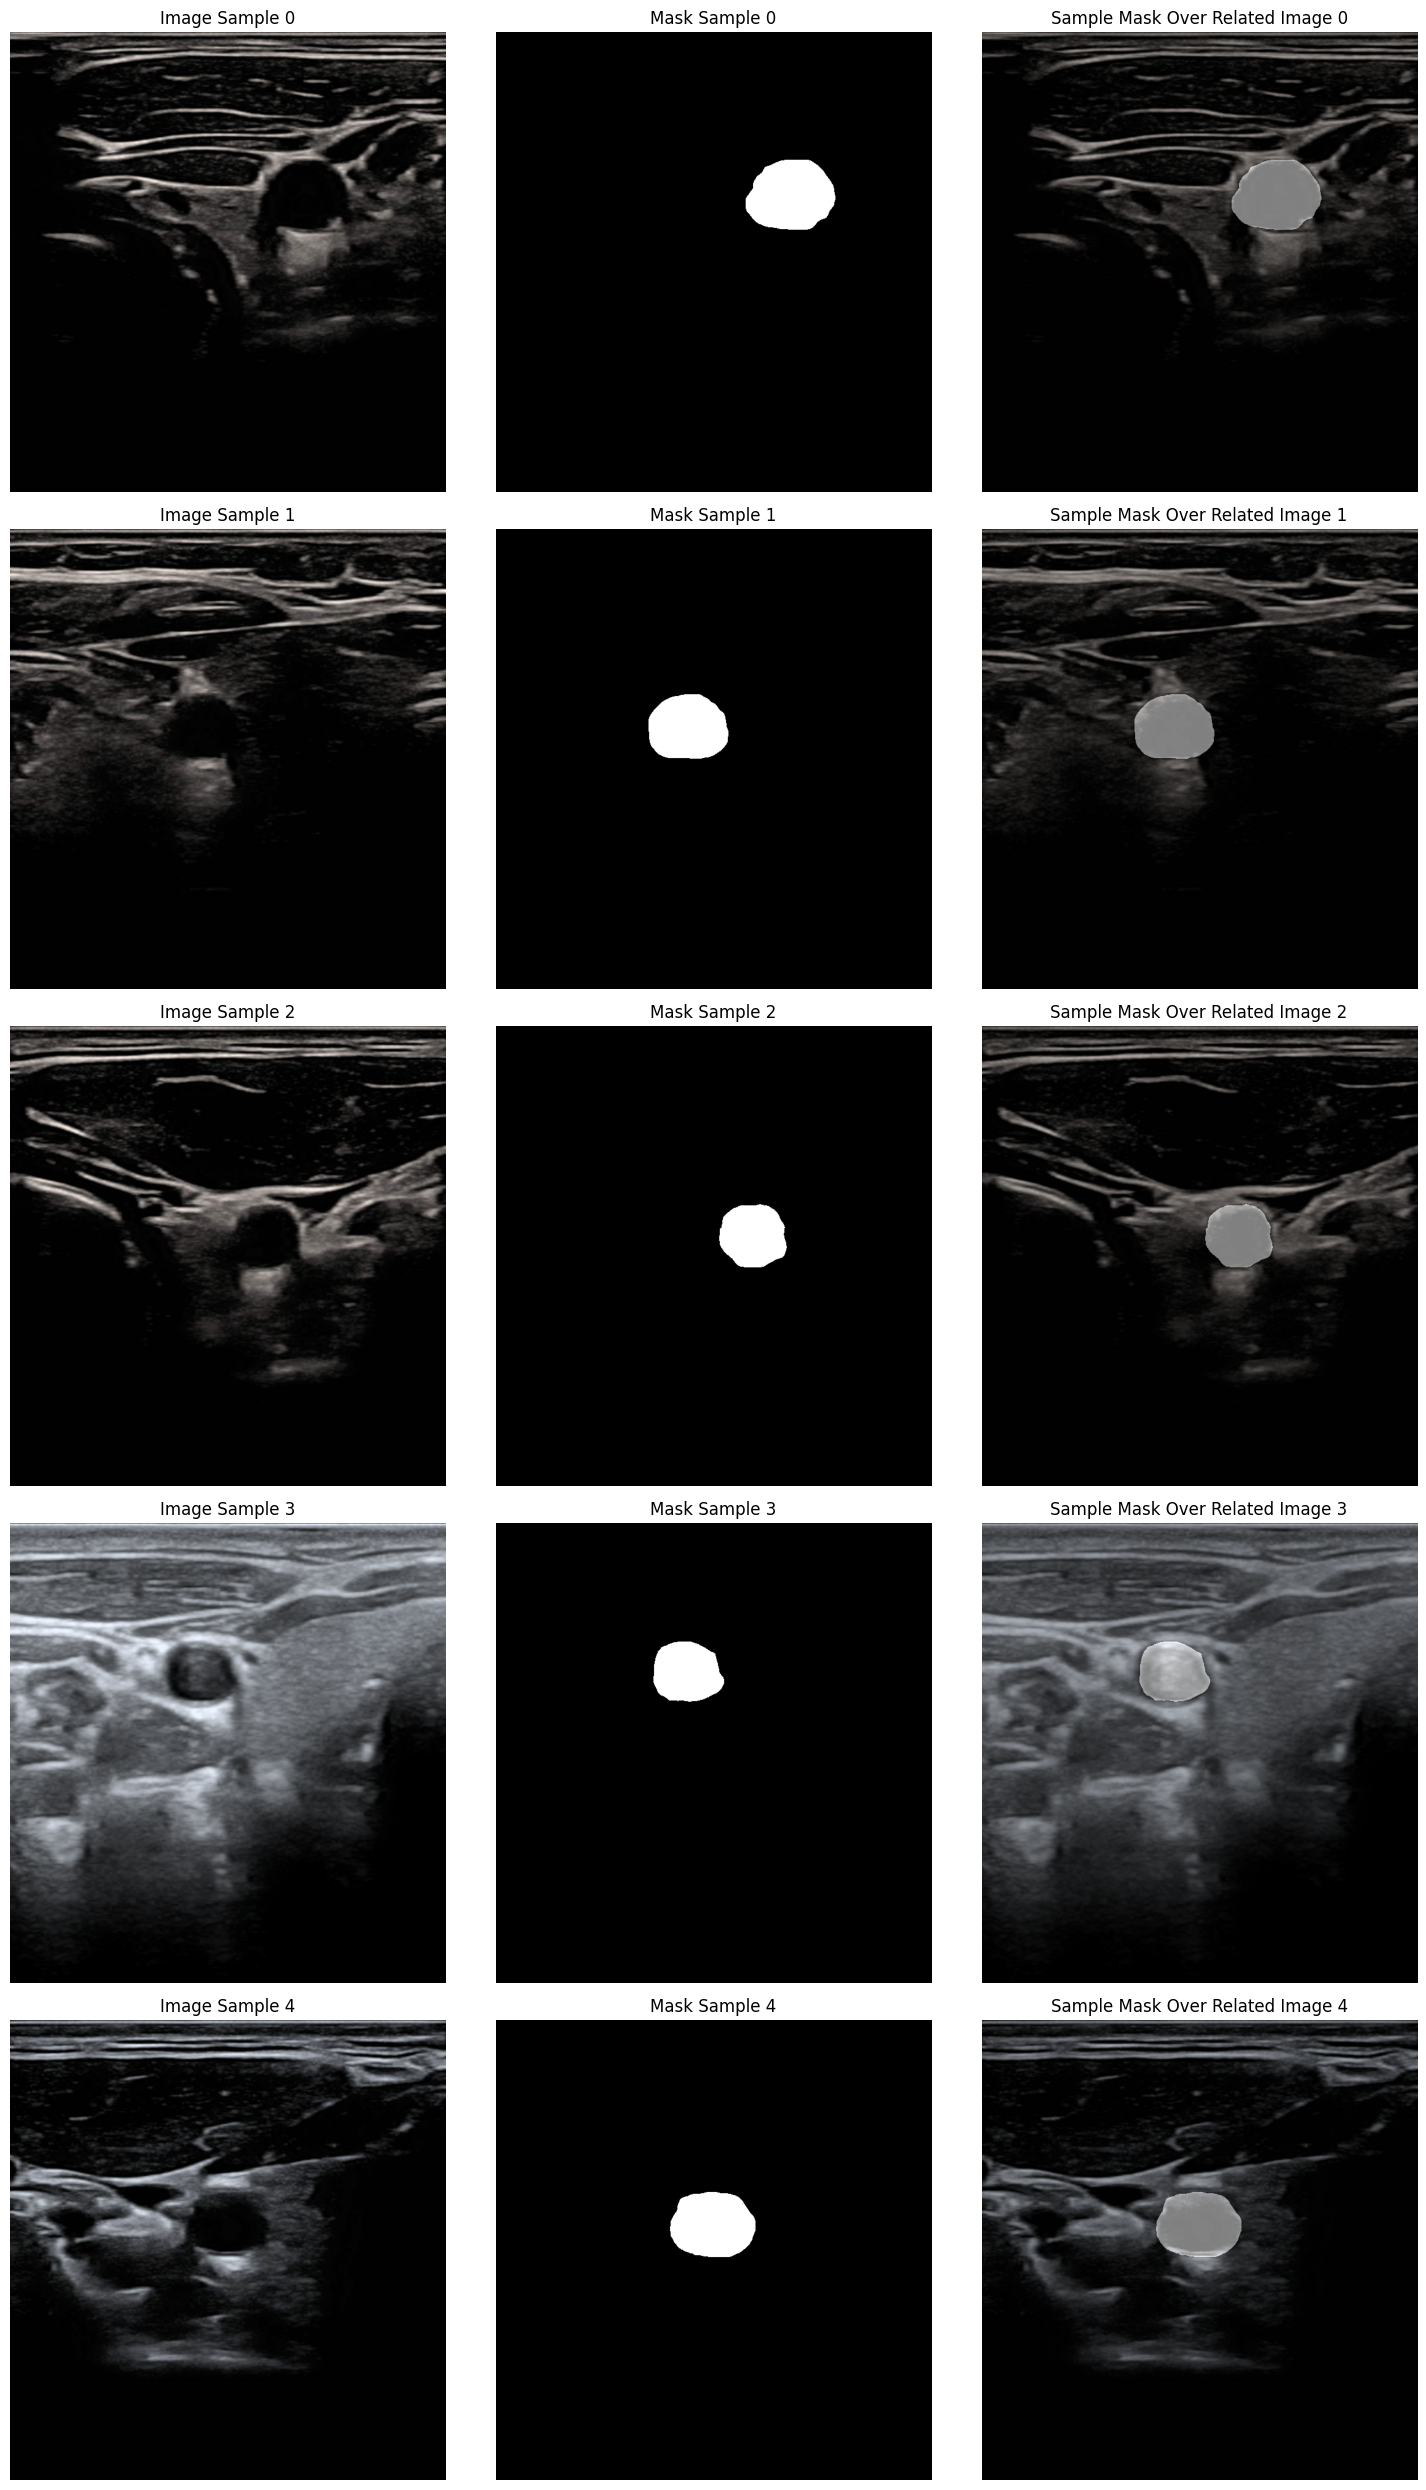

In [6]:
sam_num = 5
for sam in range(sam_num):
  images = []
  images_paths = []
  masks_paths = []
  images = random.sample(train_images , sam_num)
  for image in images:
    image_path = os.path.join(train_img_dir, image)
    mask_path = os.path.join(train_mask_dir , image)
    images_paths.append(image_path)
    masks_paths.append(mask_path)


# Check if paths exist
for impa , mapa in zip(images_paths , masks_paths):
  if os.path.exists(impa) and os.path.exists(mapa):
    print("Paths exist!")
    print(impa, "\n", mapa)
  else:
    print("One or both paths do not exist. Check your directory structure.")

import matplotlib.pyplot as plt
plt.figure(figsize=(15, 5 * sam_num))

for i, (image_path, mask_path) in enumerate(zip(images_paths, masks_paths)):

    image = cv2.imread(image_path)
    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


    plt.subplot(sam_num, 3, 3 * i + 1)
    plt.title(f"Image Sample {i}")
    plt.imshow(image)
    print(image.shape)
    plt.axis("off")

    plt.subplot(sam_num, 3, 3 * i + 2)
    plt.title(f"Mask Sample {i}")
    plt.imshow(mask, cmap="gray")
    print(mask.shape)
    plt.axis("off")

    overlay = cv2.addWeighted(image, 0.7, cv2.cvtColor(mask, cv2.COLOR_GRAY2RGB), 0.5, 0)
    plt.subplot(sam_num, 3, 3 * i + 3)
    plt.title(f"Sample Mask Over Related Image {i}")
    plt.imshow(overlay)
    plt.axis("off")

plt.tight_layout()
plt.show()

**Resizing images**
<span style="font-size:24px">Custom styled text</span>


In [7]:
import torch
import cv2
import numpy as np
import os
from skimage.transform import resize
from tqdm import tqdm
from torch.utils.data import Dataset, DataLoader

IMG_WIDTH = 128
IMG_HEIGHT = 128
IMG_CHANNELS = 3

# Function to resize images
def resize_image(image, target_height, target_width):
    return resize(image, (target_height, target_width), mode="constant", preserve_range=True)


def load_data(img_dir, mask_dir):
    img_files = sorted([os.path.join(img_dir, f) for f in os.listdir(img_dir) if f.endswith((".png", ".jpg", ".jpeg"))])
    mask_files = sorted([os.path.join(mask_dir, f) for f in os.listdir(mask_dir) if f.endswith(".png")])

    X_list, Y_list = [], []

    for img_path, mask_path in tqdm(zip(img_files, mask_files), total=len(img_files)):
        img = cv2.imread(img_path)
        mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

        if img is None or mask is None:
            print(f"Warning: Could not read {img_path} or {mask_path}")
            continue

        # Resize
        img_resized = resize(img, (IMG_HEIGHT, IMG_WIDTH), mode="constant", preserve_range=True)
        mask_resized = resize(mask, (IMG_HEIGHT, IMG_WIDTH), mode="constant", preserve_range=True).reshape(IMG_HEIGHT, IMG_WIDTH, 1)

        # Normalize and append
        X_list.append(img_resized / 255.0)  # Normalize images
        Y_list.append(mask_resized > 0)  # Convert masks to binary (True for segmented regions)

    return np.array(X_list, dtype=np.float32), np.array(Y_list, dtype=np.float32)

# Load dataset
X_train, Y_train = load_data(train_img_dir, train_mask_dir)
X_val, Y_val = load_data(val_img_dir, val_mask_dir)




100%|██████████| 250/250 [00:25<00:00,  9.89it/s]


**Defining metrics for model training**
<span style="font-size:24px">Custom styled text</span>


In [9]:
from tensorflow.keras.layers import Flatten
import tensorflow.keras.backend as K  # Ensure correct import


def dice_coef(y_true, y_pred):
    y_true_f = tf.keras.backend.flatten(y_true)
    y_pred_f = tf.keras.backend.flatten(y_pred)
    intersection = tf.reduce_sum(y_true_f * y_pred_f)
    dice = (2. * intersection + 1) / (tf.reduce_sum(y_true_f) + tf.reduce_sum(y_pred_f) + 1)
    return dice



**The model architecture**
<span style="font-size:24px">Custom styled text</span>


In [20]:
from keras.models import Model, load_model
from keras.layers import Input
from keras.layers import Dropout, Lambda
from keras.layers import Conv2D, Conv2DTranspose
from keras.layers import MaxPooling2D
from keras.layers import concatenate
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import backend as K
import tensorflow as tf
from tensorflow.keras.optimizers import Adam

# Build U-Net model
# Note we make our layers varaibles so that we can concatenate or stack
# This is required so that we can re-create our U-Net Model


inputs = Input(shape=(IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))  # Add `shape=`

s = Lambda(lambda x: x / 255) (inputs)

c1 = Conv2D(16, (3, 3), activation='relu', padding='same') (s)
c1 = Dropout(0.1) (c1)
c1 = Conv2D(16, (3, 3), activation='relu', padding='same') (c1)
p1 = MaxPooling2D((2, 2)) (c1)

c2 = Conv2D(32, (3, 3), activation='relu', padding='same') (p1)
c2 = Dropout(0.1) (c2)
c2 = Conv2D(32, (3, 3), activation='relu', padding='same') (c2)
p2 = MaxPooling2D((2, 2)) (c2)

c3 = Conv2D(64, (3, 3), activation='relu', padding='same') (p2)
c3 = Dropout(0.2) (c3)
c3 = Conv2D(64, (3, 3), activation='relu', padding='same') (c3)
p3 = MaxPooling2D((2, 2)) (c3)

c4 = Conv2D(128, (3, 3), activation='relu', padding='same') (p3)
c4 = Dropout(0.2) (c4)
c4 = Conv2D(128, (3, 3), activation='relu', padding='same') (c4)
p4 = MaxPooling2D(pool_size=(2, 2)) (c4)

c5 = Conv2D(256, (3, 3), activation='relu', padding='same') (p4)
c5 = Dropout(0.3) (c5)
c5 = Conv2D(256, (3, 3), activation='relu', padding='same') (c5)

u6 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same') (c5)
u6 = concatenate([u6, c4])
c6 = Conv2D(128, (3, 3), activation='relu', padding='same') (u6)
c6 = Dropout(0.2) (c6)
c6 = Conv2D(128, (3, 3), activation='relu', padding='same') (c6)

u7 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same') (c6)
u7 = concatenate([u7, c3])
c7 = Conv2D(64, (3, 3), activation='relu', padding='same') (u7)
c7 = Dropout(0.2) (c7)
c7 = Conv2D(64, (3, 3), activation='relu', padding='same') (c7)

u8 = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same') (c7)
u8 = concatenate([u8, c2])
c8 = Conv2D(32, (3, 3), activation='relu', padding='same') (u8)
c8 = Dropout(0.1) (c8)
c8 = Conv2D(32, (3, 3), activation='relu', padding='same') (c8)

u9 = Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same') (c8)
u9 = concatenate([u9, c1], axis=3)
c9 = Conv2D(16, (3, 3), activation='relu', padding='same') (u9)
c9 = Dropout(0.1) (c9)
c9 = Conv2D(16, (3, 3), activation='relu', padding='same') (c9)

# Note our output is effectively a mask of 128 x 128
outputs = Conv2D(1, (1, 1), activation='sigmoid') (c9)

initial_lr = 1e-4
optimizer = Adam(learning_rate=initial_lr)

model = Model(inputs=[inputs], outputs=[outputs])
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=[dice_coef])
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda_1 (Lambda)   │ (None, 128, 128,  │          0 │ input_layer_1[0]… │
│                     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_19 (Conv2D)  │ (None, 128, 128,  │        448 │ lambda_1[0][0]    │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_9 (Dropout) │ (None, 128, 128,  │          0 │ conv2d_19[0][0]   │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_20 (Conv2D)  │ (None, 128, 128,  │      2,320 │ dropout_9[0][0]   │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_4     │ (None, 64, 64,    │          0 │ conv2d_20[0][0]   │
│ (MaxPooling2D)      │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_21 (Conv2D)  │ (None, 64, 64,    │      4,640 │ max_pooling2d_4[… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_10          │ (None, 64, 64,    │          0 │ conv2d_21[0][0]   │
│ (Dropout)           │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_22 (Conv2D)  │ (None, 64, 64,    │      9,248 │ dropout_10[0][0]  │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_5     │ (None, 32, 32,    │          0 │ conv2d_22[0][0]   │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_23 (Conv2D)  │ (None, 32, 32,    │     18,496 │ max_pooling2d_5[… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_11          │ (None, 32, 32,    │          0 │ conv2d_23[0][0]   │
│ (Dropout)           │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_24 (Conv2D)  │ (None, 32, 32,    │     36,928 │ dropout_11[0][0]  │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_6     │ (None, 16, 16,    │          0 │ conv2d_24[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_25 (Conv2D)  │ (None, 16, 16,    │     73,856 │ max_pooling2d_6[… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_12          │ (None, 16, 16,    │          0 │ conv2d_25[0][0]   │
│ (Dropout)           │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_26 (Conv2D)  │ (None, 16, 16,    │    147,584 │ dropout_12[0][0]

 Total params: 1,941,105 (7.40 MB)

 Trainable params: 1,941,105 (7.40 MB)

 Non-trainable params: 0 (0.00 B)

**Model callbacks**
<span style="font-size:24px">Custom styled text</span>


In [21]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Define model save path
model_path = "./nuclei_finder_unet_1.h5"

# Initialize callbacks
checkpoint = ModelCheckpoint(model_path,
                             monitor="val_loss",
                             mode="min",
                             save_best_only=True,
                             verbose=1)


reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.5,      # Reduce by half
                              patience=3,      # After 3 epochs with no improvement
                              verbose=1,
                              min_lr=1e-7)     # Don't go below this

earlystop = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=5,
                          verbose=1,
                          restore_best_weights=True)

callbacks = [earlystop, checkpoint, reduce_lr]

In [11]:
print(f"Model Input Shape: {model.input_shape}")
print(f"X_train Shape: {X_train.shape}, Y_train Shape: {Y_train.shape}")

Model Input Shape: (None, 128, 128, 3)
X_train Shape: (750, 128, 128, 3), Y_train Shape: (750, 128, 128, 1)


**Model training**
<span style="font-size:24px">Custom styled text</span>


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_220']
Received: inputs=Tensor(shape=(None, 128, 128, 3))
  warnings.warn(msg)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - dice_coef: 0.0630 - loss: 0.6901
Epoch 1: val_loss improved from inf to 0.63107, saving model to ./nuclei_finder_unet_1.h5


47/47 ━━━━━━━━━━━━━━━━━━━━ 126s 3s/step - dice_coef: 0.0630 - loss: 0.6899 - val_dice_coef: 0.0629 - val_loss: 0.6311 - learning_rate: 1.0000e-04
Epoch 2/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - dice_coef: 0.0334 - loss: 0.3821
Epoch 2: val_loss improved from 0.63107 to 0.20333, saving model to ./nuclei_finder_unet_1.h5


47/47 ━━━━━━━━━━━━━━━━━━━━ 140s 2s/step - dice_coef: 0.0331 - loss: 0.3800 - val_dice_coef: 0.0258 - val_loss: 0.2033 - learning_rate: 1.0000e-04
Epoch 3/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - dice_coef: 0.0263 - loss: 0.1798
Epoch 3: val_loss improved from 0.20333 to 0.12546, saving model to ./nuclei_finder_unet_1.h5


47/47 ━━━━━━━━━━━━━━━━━━━━ 142s 2s/step - dice_coef: 0.0267 - loss: 0.1793 - val_dice_coef: 0.1235 - val_loss: 0.1255 - learning_rate: 1.0000e-04
Epoch 4/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - dice_coef: 0.1363 - loss: 0.1082
Epoch 4: val_loss improved from 0.12546 to 0.11254, saving model to ./nuclei_finder_unet_1.h5


47/47 ━━━━━━━━━━━━━━━━━━━━ 115s 2s/step - dice_coef: 0.1366 - loss: 0.1082 - val_dice_coef: 0.1538 - val_loss: 0.1125 - learning_rate: 1.0000e-04
Epoch 5/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - dice_coef: 0.1480 - loss: 0.1039
Epoch 5: val_loss improved from 0.11254 to 0.11231, saving model to ./nuclei_finder_unet_1.h5


47/47 ━━━━━━━━━━━━━━━━━━━━ 143s 2s/step - dice_coef: 0.1480 - loss: 0.1040 - val_dice_coef: 0.1523 - val_loss: 0.1123 - learning_rate: 1.0000e-04
Epoch 6/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - dice_coef: 0.1488 - loss: 0.1029
Epoch 6: val_loss improved from 0.11231 to 0.11027, saving model to ./nuclei_finder_unet_1.h5


47/47 ━━━━━━━━━━━━━━━━━━━━ 141s 2s/step - dice_coef: 0.1488 - loss: 0.1029 - val_dice_coef: 0.1545 - val_loss: 0.1103 - learning_rate: 1.0000e-04
Epoch 7/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - dice_coef: 0.1572 - loss: 0.1012
Epoch 7: val_loss improved from 0.11027 to 0.10971, saving model to ./nuclei_finder_unet_1.h5


47/47 ━━━━━━━━━━━━━━━━━━━━ 117s 2s/step - dice_coef: 0.1572 - loss: 0.1012 - val_dice_coef: 0.1590 - val_loss: 0.1097 - learning_rate: 1.0000e-04
Epoch 8/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - dice_coef: 0.1578 - loss: 0.1005
Epoch 8: val_loss improved from 0.10971 to 0.10606, saving model to ./nuclei_finder_unet_1.h5


47/47 ━━━━━━━━━━━━━━━━━━━━ 142s 2s/step - dice_coef: 0.1579 - loss: 0.1004 - val_dice_coef: 0.1757 - val_loss: 0.1061 - learning_rate: 1.0000e-04
Epoch 9/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - dice_coef: 0.1718 - loss: 0.0963
Epoch 9: val_loss improved from 0.10606 to 0.10246, saving model to ./nuclei_finder_unet_1.h5


47/47 ━━━━━━━━━━━━━━━━━━━━ 142s 2s/step - dice_coef: 0.1719 - loss: 0.0963 - val_dice_coef: 0.1901 - val_loss: 0.1025 - learning_rate: 1.0000e-04
Epoch 10/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - dice_coef: 0.1975 - loss: 0.0918
Epoch 10: val_loss did not improve from 0.10246
47/47 ━━━━━━━━━━━━━━━━━━━━ 141s 2s/step - dice_coef: 0.1976 - loss: 0.0918 - val_dice_coef: 0.2183 - val_loss: 0.1062 - learning_rate: 1.0000e-04
Epoch 11/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - dice_coef: 0.2269 - loss: 0.0874
Epoch 11: val_loss improved from 0.10246 to 0.09945, saving model to ./nuclei_finder_unet_1.h5


47/47 ━━━━━━━━━━━━━━━━━━━━ 143s 2s/step - dice_coef: 0.2270 - loss: 0.0874 - val_dice_coef: 0.2406 - val_loss: 0.0994 - learning_rate: 1.0000e-04
Epoch 12/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - dice_coef: 0.2723 - loss: 0.0797
Epoch 12: val_loss improved from 0.09945 to 0.08200, saving model to ./nuclei_finder_unet_1.h5


47/47 ━━━━━━━━━━━━━━━━━━━━ 142s 2s/step - dice_coef: 0.2724 - loss: 0.0796 - val_dice_coef: 0.2865 - val_loss: 0.0820 - learning_rate: 1.0000e-04
Epoch 13/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - dice_coef: 0.3021 - loss: 0.0730
Epoch 13: val_loss improved from 0.08200 to 0.07101, saving model to ./nuclei_finder_unet_1.h5


47/47 ━━━━━━━━━━━━━━━━━━━━ 142s 2s/step - dice_coef: 0.3024 - loss: 0.0730 - val_dice_coef: 0.3305 - val_loss: 0.0710 - learning_rate: 1.0000e-04
Epoch 14/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - dice_coef: 0.3579 - loss: 0.0654
Epoch 14: val_loss improved from 0.07101 to 0.07004, saving model to ./nuclei_finder_unet_1.h5


47/47 ━━━━━━━━━━━━━━━━━━━━ 141s 2s/step - dice_coef: 0.3580 - loss: 0.0654 - val_dice_coef: 0.3590 - val_loss: 0.0700 - learning_rate: 1.0000e-04
Epoch 15/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - dice_coef: 0.4093 - loss: 0.0577
Epoch 15: val_loss improved from 0.07004 to 0.06931, saving model to ./nuclei_finder_unet_1.h5


47/47 ━━━━━━━━━━━━━━━━━━━━ 141s 2s/step - dice_coef: 0.4095 - loss: 0.0577 - val_dice_coef: 0.3797 - val_loss: 0.0693 - learning_rate: 1.0000e-04
Epoch 16/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - dice_coef: 0.4857 - loss: 0.0502
Epoch 16: val_loss improved from 0.06931 to 0.04489, saving model to ./nuclei_finder_unet_1.h5


47/47 ━━━━━━━━━━━━━━━━━━━━ 143s 2s/step - dice_coef: 0.4868 - loss: 0.0501 - val_dice_coef: 0.5859 - val_loss: 0.0449 - learning_rate: 1.0000e-04
Epoch 17/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - dice_coef: 0.6460 - loss: 0.0407
Epoch 17: val_loss improved from 0.04489 to 0.04332, saving model to ./nuclei_finder_unet_1.h5


47/47 ━━━━━━━━━━━━━━━━━━━━ 114s 2s/step - dice_coef: 0.6464 - loss: 0.0407 - val_dice_coef: 0.6495 - val_loss: 0.0433 - learning_rate: 1.0000e-04
Epoch 18/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - dice_coef: 0.7000 - loss: 0.0352
Epoch 18: val_loss improved from 0.04332 to 0.03065, saving model to ./nuclei_finder_unet_1.h5


47/47 ━━━━━━━━━━━━━━━━━━━━ 117s 2s/step - dice_coef: 0.7005 - loss: 0.0352 - val_dice_coef: 0.7428 - val_loss: 0.0307 - learning_rate: 1.0000e-04
Epoch 19/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - dice_coef: 0.7550 - loss: 0.0281
Epoch 19: val_loss improved from 0.03065 to 0.02841, saving model to ./nuclei_finder_unet_1.h5


47/47 ━━━━━━━━━━━━━━━━━━━━ 116s 2s/step - dice_coef: 0.7551 - loss: 0.0281 - val_dice_coef: 0.7726 - val_loss: 0.0284 - learning_rate: 1.0000e-04
Epoch 20/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - dice_coef: 0.7892 - loss: 0.0252
Epoch 20: val_loss improved from 0.02841 to 0.02546, saving model to ./nuclei_finder_unet_1.h5


47/47 ━━━━━━━━━━━━━━━━━━━━ 143s 2s/step - dice_coef: 0.7893 - loss: 0.0252 - val_dice_coef: 0.7920 - val_loss: 0.0255 - learning_rate: 1.0000e-04
Restoring model weights from the end of the best epoch: 20.


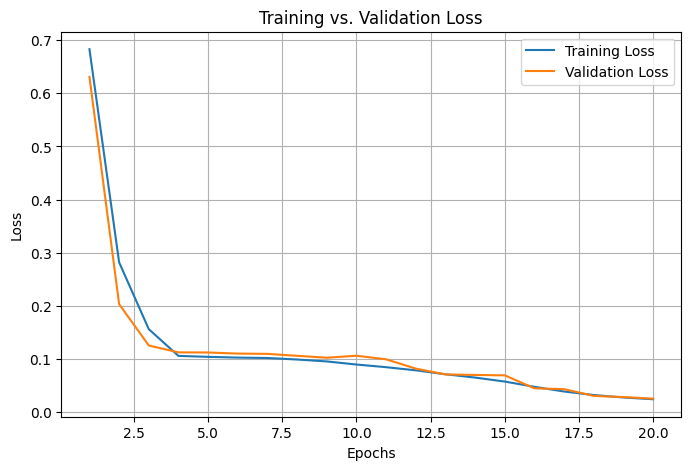

In [22]:
results = model.fit(X_train, Y_train,
                    validation_data=(X_val, Y_val),
                    epochs=20,
                    batch_size=16,
                    callbacks=callbacks,
                    verbose=1)


import matplotlib.pyplot as plt

# Extract loss values from the training history
loss = results.history['loss']
val_loss = results.history['val_loss']
epochs_range = range(1, len(loss) + 1)

plt.figure(figsize=(8, 5))
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs. Validation Loss')
plt.legend()
plt.grid(True)
plt.show()


**Model evaluation**
<span style="font-size:24px">Custom styled text</span>


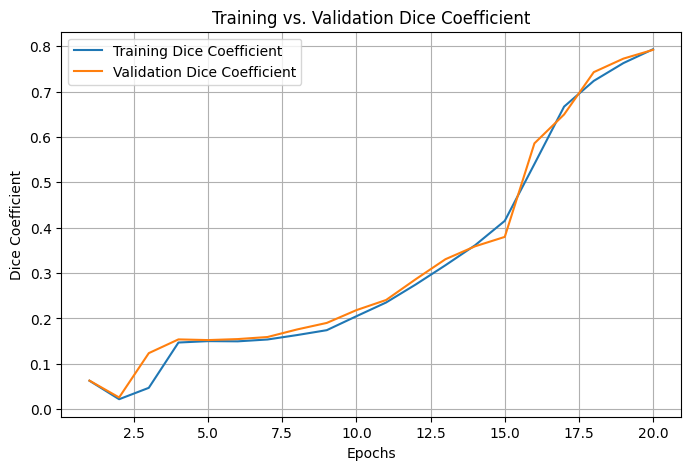

In [23]:
# Extract Dice Coefficient
dice = results.history['dice_coef']
val_dice = results.history['val_dice_coef']
epochs_range = range(1, len(dice) + 1)

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(epochs_range, dice, label='Training Dice Coefficient')
plt.plot(epochs_range, val_dice, label='Validation Dice Coefficient')
plt.xlabel('Epochs')
plt.ylabel('Dice Coefficient')
plt.title('Training vs. Validation Dice Coefficient')
plt.legend()
plt.grid(True)
plt.show()


In [24]:
final_train_dice = dice[-1]
final_val_dice = val_dice[-1]

print(f"Final Training Dice Coefficient: {final_train_dice:.4f}")
print(f"Final Validation Dice Coefficient: {final_val_dice:.4f}")


Final Training Dice Coefficient: 0.7933
Final Validation Dice Coefficient: 0.7920


**Predicted mask for some test images with the trained model**
<span style="font-size:">Custom styled text</span>


100%|██████████| 100/100 [00:11<00:00,  9.07it/s]


4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step


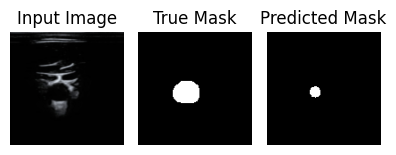

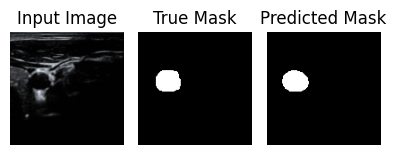

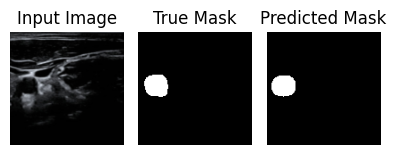

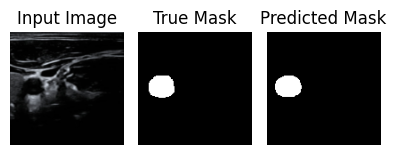

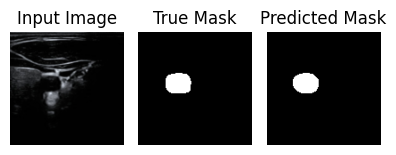

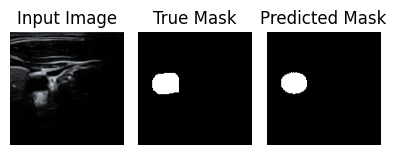

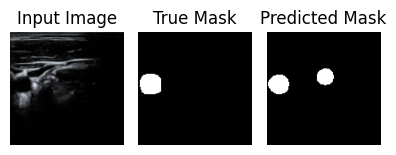

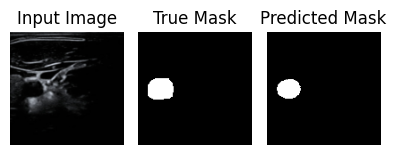

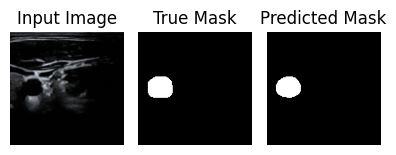

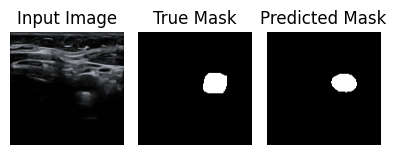

In [26]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

test_img_dir= '/kaggle/test/images'
test_mask_dir= '/kaggle/test/masks'
# Reuse your preprocessing function
X_test, Y_test = load_data(test_img_dir, test_mask_dir)

# Load your Keras model with custom dice metric
model = load_model(model_path, custom_objects={'dice_coef': dice_coef})

# Predict on test data
preds = model.predict(X_test)
preds_binary = (preds > 0.5).astype(np.uint8)

# Plot a few predictions
# Plot 10 predictions with smaller figure sizes
for i in range(min(10, len(X_test))):  # Visualize first 10 samples
    fig, axs = plt.subplots(1, 3, figsize=(4, 2))  # Smaller figure size
    axs[0].imshow(X_test[i])
    axs[0].set_title('Input Image')

    axs[1].imshow(Y_test[i].squeeze(), cmap='gray')
    axs[1].set_title('True Mask')

    axs[2].imshow(preds_binary[i].squeeze(), cmap='gray')
    axs[2].set_title('Predicted Mask')

    for ax in axs:
        ax.axis('off')
    plt.tight_layout()
    plt.show()

